# 17 - Regresion Lineal Simple con Scikit-Learn


* En este Notebook vamos a resolver un problema de ***Regresión Lineal Simple con la librería de Scikit-Learn***.


* Para resolver el problema de regresión vamos a utilizar la clase **"LinearRegression()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


* El ejemplo consiste en predecir cuantas calorías voy a quemar en función de los minutos que voy a estar corriendo. Por ello tenemos un conjunto de datos tomados de forma empírica que nos dan esa relación. 


* El objetivo es encontrar los parámetros de la recta que mejor se ajustan a esos datos.

    <span style="font-size:18px">$$calorias = a \cdot tiempo + b$$</span>


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. [Carga de datos](#M1)
<span></span><br>
    2. [Cambio de estructura de datos a numpy](#M2)
<span></span><br>
    3. [Visualización de los datos](#M3)
<span></span><br>
    4. [Creacción del modelo (hipótesis) y ajuste](#M4)
<span></span><br>
    5. [Obtención del modelo (hipótesis)](#M5)
<span></span><br>
    6. [Visualización del modelo](#M6)
<span></span><br>
    7. [Medición de la calidad de los resultados](#M7)


<hr>


* En primer lugar vamos a importar las librería necesarias:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline 

<hr>


## <a name="M1">1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en los siguientes ficheros:
    - ***DataSet***: "./data/calorias_running/calories_time.csv"
    - ***DataSet Reducido***: "./data/calorias_running/calories_time_reduc.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - Calories
    - Time


In [2]:
df = pd.read_csv("./data/calorias_running/calories_time.csv")
df.sample(5)

,Calories,Time
4431,711.3,38.8
4059,847.0,87.7
4409,538.0,29.8
2027,662.7,58.5
3948,1187.7,52.9


<hr>


## <a name="M2">2. Cambio de estructura de datos a numpy</a>


* Scikit necesita como entrada para el ajuste (o entrenamiento) del modelo los datos del Dataset de la siguiente forma:
<span></span><br><br>
    - ***Variables de entrada X***: ***Array de Arrays de numpy*** en el que cada array tiene las variables de entrada de un elemento.
<span></span><br><br>
    - ***Variable de salida y*** (solo para aprendizaje supervisado): ***Array de numpy*** en el que cada posición del array contiene la salida o el valor esperado del elemento del Dataset.


* Por tanto, vamos a pasar los datos de las calorias y el tiempo a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - La ***columna Tiempo*** que representa la variable independiente 'x', la vamos a pasar a un array de array (***numpy array***)
<span></span><br><br>
    - La ***columna calorias*** que representa la variable dependiente 'y', la vamos a pasar a un ***numpy array***


In [3]:
X = df['Time'].values
y = df['Calories'].values

# Pasamos la variable independiente (X) de un array a un array de arrays.
X = np.reshape(np.asarray(X), (len(X), 1))

<hr>


## <a name="M3">3. Visualización de los datos</a>


* A continuación pasamos a mostrar visualmente la distribución de los datos que tenemos con una gráfica de dispersión:


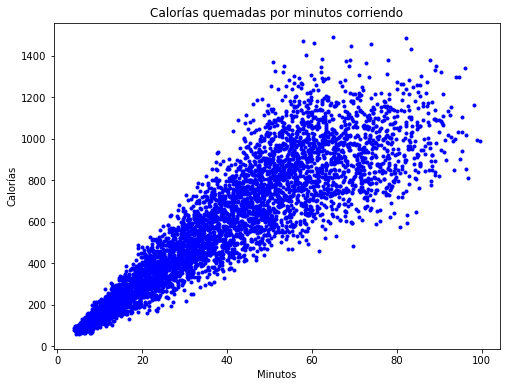

In [4]:
fig, ax =  plt.subplots(figsize=(8, 6))
ax.scatter(X, y,  color='blue', marker='.', )
ax.set_title("Calorías quemadas por minutos corriendo")
ax.set_xlabel("Minutos")
ax.set_ylabel("Calorías")
plt.show()

<hr>


## <a name="M4">4. Creacción del modelo (hipótesis) y ajuste</a>


* A continuación pasamos a crear un objeto de la clase "***LinearRegression()***" para la resolución del problema de regresión.


* Una vez instanciado, procedemos a ajustar (entrenar) el modelo (o hipótesis) llamando al método ***fit(X,y)*** que recibe como parámetros el conjunto de datos de la variable independiente 'X' y la variable dependiente 'Y'.


* Una vez ajustado (o entrenado) el modelo (o hipótesis), tendremos ajustados los parámetros **'a'** y **'b'** de la recta de regresión de la siguiente manera:

    <span style="font-size:18px">$calorias = a \cdot tiempo + b$</span>

In [5]:
# Creamos un objeto de la clase LinearRegression
reg = linear_model.LinearRegression()

# Entrenamos el modelo pasandole las variables independientes y dependiente
reg.fit(X, y)

LinearRegression()

<hr>


## <a name="M5">5. Obtención del modelo (hipótesis)</a>


* El objeto de la clase ***LinearRegression*** nos proporciona los resultados de los ajustes de la recta por medio de los atributos de la clase:
<span></span><br><br>
    - ***coef_***: Nos da en una lista los coeficientes de la recta asociados a las variable independientes. En este caso nos da 1 ya que solo tenemos una variable independiente X.
<span></span><br><br>
    - ***intercept_***: Nos devuelve el termino independiente de la recta de regresión; es decir la ***'b'***


In [6]:
# Obtenemos los coheficientes
a = reg.coef_[0]
b = reg.intercept_

print ("Y = {a:0.2f}X + {b:0.2f}".format(a=a, b=b))
print ("\nCalorias = {a:0.2f} · Tiempo + {b:0.2f}".format(a=a, b=b))

Y = 12.92X + 71.14

Calorias = 12.92 · Tiempo + 71.14


<hr>


## <a name="M6">6. Visualización del modelo</a>


* Para visualizar el modelo vamos a dibujar la recta de regresión aplicando el modelo a los elementos del Dataset.


* Las ***clases de Scikit que implementan la interfaz "Predictors" tienen implementado el método "predict(x)"*** que dadas una variables de entrada (variable independientes en el caso de la regresión), ***devuelve la predicción***; o lo que es lo mismo, el resultado tras aplicar el modelo a cada elemento.

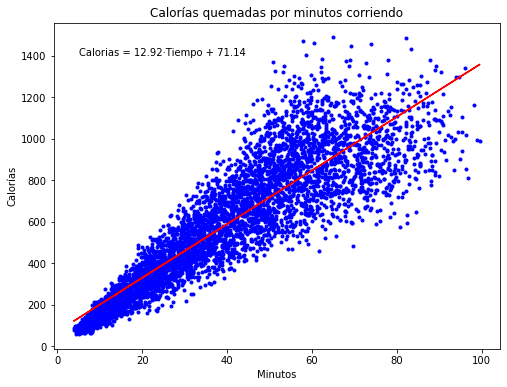

In [7]:
# Obtenemos las predicciones de los elementos del Dataset con el modelo generado
predicciones = reg.predict(X)

# Pintamos los elementos y la recta de regresión
fig, ax =  plt.subplots(figsize=(8, 6))
ax.scatter(X, y,  color='blue', marker='.', )
ax.plot(X, predicciones, color='red')
ax.set_title("Calorías quemadas por minutos corriendo")
ax.set_xlabel("Minutos")
ax.set_ylabel("Calorías")
ax.text(5, 1400,"Calorias = {a:0.2f}·Tiempo + {b:0.2f}".format(a=a, b=b))
plt.show()

<hr>


## <a name="M7">7. Medición de la calidad de los resultados</a>


* Las ***clases de Scikit que implementan la interfaz "Predictors"*** tienen implementado el método ***"predict(x)"*** para la predicción de nuevos elementos a partir del modelo generado y también implementan otro método que es el método ***score(X,y)*** que devuelve una medida de calidad del modelo generado.


* Para el caso de la Regresión Lineal, el método ***score(X,y)*** devuelve la medida del ***Coeficiente de Determinación R<sup>2</sup>*** que es una medida que nos dice cuanto se ajusta la recta a los datos con los que se ha obtenido la recta, siendo valor '1' un ajuste perfecto y valor '0' un desajuste perfecto.

In [8]:
r2 = reg.score(X, y)

print ("Coeficiente de determinación R^2: {r2}".format(r2=r2))

Coeficiente de determinación R^2: 0.79589498233559


<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">